In [242]:
import pandas as pd
import numpy as np
pd.options.display.precision = 2

# pandas
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.</br>
pandas original website https://pandas.pydata.org/ .
###### written by mohammad hosein pour

# Series 

In [243]:
# Series
# A Pandas Series is like a column in a table.
# It is a one-dimensional array holding data of any type.

names = ['alice', 'james', 'bob']
MySeries = pd.Series(names)
MySeries

0    alice
1    james
2      bob
dtype: object

In [244]:
names = {"person_1": "alice", "person_2": 'james', "person_3": 'bob'}
myNames = pd.Series(names)
print(myNames)
# or 
names_ = ['alice', 'james', 'bob']
myNames_ = pd.Series(names_, index=['person_1', 'person_2', 'person_3'])
print(myNames_)

person_1    alice
person_2    james
person_3      bob
dtype: object
person_1    alice
person_2    james
person_3      bob
dtype: object


# Dataframe

In [245]:
people = {
    "Name": ['alice', 'james', 'arya', 'david'],
    "Age" : [17, 25, 20, 28],
    "weight": [60, 75, 70, 80], # kg
    "height": [170, 180, 165, 182] # centimeters
}

MyDataframe = pd.DataFrame(people)
MyDataframe

,Name,Age,weight,height
0,alice,17,60,170
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


Dataframe can have different types of columns</br>
integer, float, boolean, datetime, object are mostly used types</br>
objects in pandas are String or Mixed (string_, unicode_, mixed types)

In [246]:
Types_Dataframe = pd.DataFrame(
    {
        "float": np.e,
        "time": pd.date_range("20200101", periods=6),
        "string": pd.Series(["Alice", "Bob", "Charlie", "Daneil", "Emma", "Frank"]), # Object type
        "integer": np.array([1, 2, 3, 4, 5, 6]), 
        "array": [["item_1", "item_2"]] * 6 # Object Type (mixed)
        
    })
Types_Dataframe

,float,time,string,integer,array
0,2.72,2020-01-01,Alice,1,"[item_1, item_2]"
1,2.72,2020-01-02,Bob,2,"[item_1, item_2]"
2,2.72,2020-01-03,Charlie,3,"[item_1, item_2]"
3,2.72,2020-01-04,Daneil,4,"[item_1, item_2]"
4,2.72,2020-01-05,Emma,5,"[item_1, item_2]"
5,2.72,2020-01-06,Frank,6,"[item_1, item_2]"


In [247]:
Types_Dataframe.dtypes

float             float64
time       datetime64[ns]
string             object
integer             int32
array              object
dtype: object

# rows and columns 

In [248]:
MyDataframe

,Name,Age,weight,height
0,alice,17,60,170
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


### selecting row

In [249]:
MyDataframe.loc[0] 
# MyDataframe[0] will raise an error

Name      alice
Age          17
weight       60
height      170
Name: 0, dtype: object

In [250]:
# Or
MyDataframe.iloc[0]

Name      alice
Age          17
weight       60
height      170
Name: 0, dtype: object

In [251]:
MyDataframe_ = MyDataframe.set_index("Name") # setting Name as index
MyDataframe_

,Age,weight,height
Name,,,
alice,17,60,170
james,25,75,180
arya,20,70,165
david,28,80,182


In [252]:
MyDataframe_.loc["alice"]

Age        17
weight     60
height    170
Name: alice, dtype: int64

### selecting column 

In [253]:
MyDataframe

,Name,Age,weight,height
0,alice,17,60,170
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


In [254]:
MyDataframe["Name"]
# MyDataframe.loc["Name"] will raise an error

0    alice
1    james
2     arya
3    david
Name: Name, dtype: object

### selecting single value 

In [255]:
MyDataframe.loc[0, 'Name']

'alice'

In [256]:
# Or
MyDataframe.at[0, "Name"]

'alice'

In [257]:
# Or
MyDataframe.loc[0].at['Name']

'alice'

### selecting multiple columns and rows

In [258]:
MyDataframe.loc[[0, 1]]
# When using [], the result is a Pandas DataFrame.

,Name,Age,weight,height
0,alice,17,60,170
1,james,25,75,180


In [259]:
MyDataframe[['Name', "Age"]]

,Name,Age
0,alice,17
1,james,25
2,arya,20
3,david,28


### selecting by condition 

In [260]:
MyDataframe.loc[[True, False, True, False]] # Boolean
# Or 
MyDataframe[[True, False, True, False]]

,Name,Age,weight,height
0,alice,17,60,170
2,arya,20,70,165


In [261]:
MyDataframe.loc[MyDataframe["Age"] > 18]

,Name,Age,weight,height
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


In [262]:
MyDataframe.loc[(MyDataframe["weight"] > 80) | (MyDataframe['height'] > 180)] # or == | , and == & in pandas

,Name,Age,weight,height
3,david,28,80,182


### Setting values

In [263]:
MyDataframe

,Name,Age,weight,height
0,alice,17,60,170
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


In [264]:
MyDataframe.loc[0] = ["levis", 24, 78, 175]
MyDataframe

,Name,Age,weight,height
0,levis,24,78,175
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


In [265]:
MyDataframe.loc[0, ['Age']] = 27
MyDataframe

,Name,Age,weight,height
0,levis,27,78,175
1,james,25,75,180
2,arya,20,70,165
3,david,28,80,182


In [266]:
MyDataframe.loc[[1, 2], ['weight']] = 80
MyDataframe

,Name,Age,weight,height
0,levis,27,78,175
1,james,25,80,180
2,arya,20,80,165
3,david,28,80,182


### Deleting column

In [267]:
MyDataframe.drop("height", axis=1) # “axis 0” represents rows and “axis 1” represents columns
# if you don't specify 'axis' it will raise an error

,Name,Age,weight
0,levis,27,78
1,james,25,80
2,arya,20,80
3,david,28,80


In [268]:
MyDataframe.pop('weight')
MyDataframe

,Name,Age,height
0,levis,27,175
1,james,25,180
2,arya,20,165
3,david,28,182


In [269]:
MyDataframe.drop(["height", "Age"], axis=1)
# Or
MyDataframe.drop(columns=["height", "Age"])

,Name
0,levis
1,james
2,arya
3,david


In [270]:
MyDataframe["weight"] = [78, 75, 70, 80] # restoring deleted items

In [271]:
MyDataframe

,Name,Age,height,weight
0,levis,27,175,78
1,james,25,180,75
2,arya,20,165,70
3,david,28,182,80


### Deleting row 

In [272]:
MyDataframe.drop(0)

,Name,Age,height,weight
1,james,25,180,75
2,arya,20,165,70
3,david,28,182,80


In [273]:
MyDataframe.drop([0, 2])
# Or
MyDataframe.drop(labels=[0, 2])
# Or
MyDataframe.drop(index=[0, 2])

,Name,Age,height,weight
1,james,25,180,75
3,david,28,182,80


In [274]:
# inplace: Makes changes in original Data Frame if True.
MyDataframe.drop(index=0 , inplace=True)
MyDataframe

,Name,Age,height,weight
1,james,25,180,75
2,arya,20,165,70
3,david,28,182,80


### Deleting on condition

In [275]:
MyDataframe.drop(MyDataframe[MyDataframe["Age"] < 22].index) # with drop 
# Or
MyDataframe = MyDataframe[MyDataframe["Age"] < 22] # easy way
MyDataframe

,Name,Age,height,weight
2,arya,20,165,70


### Adding new row

In [276]:
MyDataframe

,Name,Age,height,weight
2,arya,20,165,70


In [277]:
MyDataframe.reset_index(drop=True) # Reset the index of the DataFrame

,Name,Age,height,weight
0,arya,20,165,70


In [278]:
newData = {"Name":'george', "Age":26, "height":178, "weight":74}
MyDataframe = MyDataframe.append(newData, ignore_index = True)
MyDataframe

,Name,Age,height,weight
0,arya,20,165,70
1,george,26,178,74


### Concatenating two DataFrames

In [279]:
newData = pd.DataFrame({"Name":['Harry', "David", "sophia"],"Age":[21, 23, 21],"height":[165, 186, 162],"weight":[75, 70, 68]})
MyDataframe = pd.concat([MyDataframe, newData])
MyDataframe

,Name,Age,height,weight
0,arya,20,165,70
1,george,26,178,74
0,Harry,21,165,75
1,David,23,186,70
2,sophia,21,162,68


In [280]:
MyDataframe = MyDataframe.reset_index(drop=True)

### Adding new column 

In [281]:
MyDataframe['gender'] = ['female', 'male', 'male', 'male', 'female']
MyDataframe

,Name,Age,height,weight,gender
0,arya,20,165,70,female
1,george,26,178,74,male
2,Harry,21,165,75,male
3,David,23,186,70,male
4,sophia,21,162,68,female


In [282]:
MyDataframe.insert(2, "job", ["student", "data scientist", "student", "laywer", "student"])
MyDataframe

,Name,Age,job,height,weight,gender
0,arya,20,student,165,70,female
1,george,26,data scientist,178,74,male
2,Harry,21,student,165,75,male
3,David,23,laywer,186,70,male
4,sophia,21,student,162,68,female


### Renaming

In [283]:
MyDataframe = MyDataframe.rename(columns={"job" : "occupation", "gender" : "male"}) # renaming column
MyDataframe

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,female
1,george,26,data scientist,178,74,male
2,Harry,21,student,165,75,male
3,David,23,laywer,186,70,male
4,sophia,21,student,162,68,female


In [284]:
MyDataframe.rename(index={0: "person_1"})

,Name,Age,occupation,height,weight,male
person_1,arya,20,student,165,70,female
1,george,26,data scientist,178,74,male
2,Harry,21,student,165,75,male
3,David,23,laywer,186,70,male
4,sophia,21,student,162,68,female


### Applying function

In [285]:
MyDataframe['male'] = MyDataframe["male"].apply(lambda x: 1 if x == 'male' else 0)
MyDataframe

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,0
1,george,26,data scientist,178,74,1
2,Harry,21,student,165,75,1
3,David,23,laywer,186,70,1
4,sophia,21,student,162,68,0


### Trim 

In [286]:
MyDataframe['height'] = MyDataframe['height'].clip(165, 180) # paramters are lower and upper bound
MyDataframe

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,0
1,george,26,data scientist,178,74,1
2,Harry,21,student,165,75,1
3,David,23,laywer,180,70,1
4,sophia,21,student,165,68,0


### Sorting

In [287]:
MyDataframe = MyDataframe.sort_values(by=["Age"])
MyDataframe

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,0
2,Harry,21,student,165,75,1
4,sophia,21,student,165,68,0
3,David,23,laywer,180,70,1
1,george,26,data scientist,178,74,1


In [288]:
MyDataframe = MyDataframe.reset_index(drop=True) # reseting indexes

### Size and dimension 

In [289]:
MyDataframe.size # returns the number of elements

30

In [290]:
MyDataframe.shape # dimensionality

(5, 6)

In [291]:
MyDataframe.ndim # returns the number of dimensions

2

In [292]:
MyDataframe.columns

Index(['Name', 'Age', 'occupation', 'height', 'weight', 'male'], dtype='object')

In [293]:
MyDataframe.index

RangeIndex(start=0, stop=5, step=1)

In [294]:
for column, value in MyDataframe.items(): # iterating over columns and their values
    print(f'column: {column}')
    print(f'value:\n{value} \n')

column: Name
value:
0      arya
1     Harry
2    sophia
3     David
4    george
Name: Name, dtype: object 

column: Age
value:
0    20
1    21
2    21
3    23
4    26
Name: Age, dtype: int64 

column: occupation
value:
0           student
1           student
2           student
3            laywer
4    data scientist
Name: occupation, dtype: object 

column: height
value:
0    165
1    165
2    165
3    180
4    178
Name: height, dtype: int64 

column: weight
value:
0    70
1    75
2    68
3    70
4    74
Name: weight, dtype: int64 

column: male
value:
0    0
1    1
2    0
3    1
4    1
Name: male, dtype: int64 



In [295]:
MyDataframe.keys

<bound method NDFrame.keys of      Name  Age      occupation  height  weight  male
0    arya   20         student     165      70     0
1   Harry   21         student     165      75     1
2  sophia   21         student     165      68     0
3   David   23          laywer     180      70     1
4  george   26  data scientist     178      74     1>

### Grouping data

In [296]:
grouped = MyDataframe.groupby(["male"]) # group data into two catogories by their gender
grouped.first() # display the first element of groups

,Name,Age,occupation,height,weight
male,,,,,
0,arya,20,student,165,70
1,Harry,21,student,165,75


In [297]:
grouped.groups # returns groupes
# 0 is 'female', 1 is 'male'

{0: [0, 2], 1: [1, 3, 4]}

In [298]:
grouped.get_group(1) # display male group

,Name,Age,occupation,height,weight,male
1,Harry,21,student,165,75,1
3,David,23,laywer,180,70,1
4,george,26,data scientist,178,74,1


In [299]:
grouped.get_group(0) # display female group

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,0
2,sophia,21,student,165,68,0


In [300]:
grouped.get_group(0)['height'].mean() # mean of female group

165.0

In [301]:
grouped.indices

{0: array([0, 2], dtype=int64), 1: array([1, 3, 4], dtype=int64)}

### Converting to numpy array

In [302]:
MyDataframe.to_numpy()

array([['arya', 20, 'student', 165, 70, 0],
       ['Harry', 21, 'student', 165, 75, 1],
       ['sophia', 21, 'student', 165, 68, 0],
       ['David', 23, 'laywer', 180, 70, 1],
       ['george', 26, 'data scientist', 178, 74, 1]], dtype=object)

In [303]:
# Or
MyDataframe.values

array([['arya', 20, 'student', 165, 70, 0],
       ['Harry', 21, 'student', 165, 75, 1],
       ['sophia', 21, 'student', 165, 68, 0],
       ['David', 23, 'laywer', 180, 70, 1],
       ['george', 26, 'data scientist', 178, 74, 1]], dtype=object)

### Convert Data types

In [304]:
MyDataframe.dtypes

Name          object
Age            int64
occupation    object
height         int64
weight         int64
male           int64
dtype: object

In [305]:
MyDataframe.astype({"Age": "int32"}).dtypes

Name          object
Age            int32
occupation    object
height         int64
weight         int64
male           int64
dtype: object

### Arithmetic

In [306]:
MyDataframe

,Name,Age,occupation,height,weight,male
0,arya,20,student,165,70,0
1,Harry,21,student,165,75,1
2,sophia,21,student,165,68,0
3,David,23,laywer,180,70,1
4,george,26,data scientist,178,74,1


In [307]:
numeric = MyDataframe.select_dtypes('number').drop('male', axis=1) # for numeric types math operations can be applied
numeric

,Age,height,weight
0,20,165,70
1,21,165,75
2,21,165,68
3,23,180,70
4,26,178,74


#### Add

In [308]:
numeric + 1
# Or
numeric.add(1)

,Age,height,weight
0,21,166,71
1,22,166,76
2,22,166,69
3,24,181,71
4,27,179,75


#### Sub 

In [309]:
numeric - 1
# Or
numeric.sub(1)

,Age,height,weight
0,19,164,69
1,20,164,74
2,20,164,67
3,22,179,69
4,25,177,73


#### multiply

In [310]:
numeric * np.pi
# Or
numeric.mul(np.pi)

,Age,height,weight
0,62.83,518.36,219.91
1,65.97,518.36,235.62
2,65.97,518.36,213.63
3,72.26,565.49,219.91
4,81.68,559.20,232.48


#### Division 

In [311]:
numeric / np.sin(np.pi / 6)
# Or
numeric.div(np.sin(np.pi / 6))

,Age,height,weight
0,40.0,330.0,140.0
1,42.0,330.0,150.0
2,42.0,330.0,136.0
3,46.0,360.0,140.0
4,52.0,356.0,148.0


#### Modulo 

In [312]:
numeric % 2
# Or
numeric.mod(2)

,Age,height,weight
0,0,1,0
1,1,1,1
2,1,1,0
3,1,0,0
4,0,0,0


#### Power

In [313]:
numeric ** 1/2
# Or
numeric.pow(1/2)

,Age,height,weight
0,4.47,12.85,8.37
1,4.58,12.85,8.66
2,4.58,12.85,8.25
3,4.80,13.42,8.37
4,5.10,13.34,8.60


#### covariance

In [314]:
numeric.cov()

,Age,height,weight
Age,5.70,15.35,2.9
height,15.35,59.30,3.2
weight,2.90,3.20,8.8


#### correlation

In [315]:
numeric.corr()

,Age,height,weight
Age,1.00,0.83,0.41
height,0.83,1.00,0.14
weight,0.41,0.14,1.00


#### Mean 

In [316]:
numeric.mean()

Age        22.2
height    170.6
weight     71.4
dtype: float64

#### Median

In [317]:
numeric.median()

Age        21.0
height    165.0
weight     70.0
dtype: float64

#### Mode 

In [318]:
numeric.mode().values

array([[ 21, 165,  70]], dtype=int64)

#### Variance 

In [319]:
numeric.var()

Age        5.7
height    59.3
weight     8.8
dtype: float64

### Filter

In [320]:
MyDataframe.filter(items=["Name" ,"height", "weight"]) # filtering by columns

,Name,height,weight
0,arya,165,70
1,Harry,165,75
2,sophia,165,68
3,David,180,70
4,george,178,74


In [321]:
MyDataframe.filter(regex='^N', axis=1) # filter by regex

,Name
0,arya
1,Harry
2,sophia
3,David
4,george


In [322]:
MyDataframe.filter(like='a')

,Name,occupation,male
0,arya,student,0
1,Harry,student,1
2,sophia,student,0
3,David,laywer,1
4,george,data scientist,1


### Loading dataset

In [323]:
# used car dataset (https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)
# Loading csv(comma seperated values) Data
df = pd.read_csv('Car details v3.csv')
df
# use to_string() to print the entire DataFrame.
# df.to_string()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [324]:
pd.options.display.max_rows
# numbers of rows pandas can display in print
# if number of rows exceed this number it will show first five rows and last five rows(like example above)

60

###  Data observation

In [325]:
df.head(8) # returns first 5 items as default

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [326]:
df.tail(4) # returns last 5 items as default

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [327]:
df.info() # a summary of data
# returns data-types, non-values, columns, memory usage, indices.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [328]:
df.describe() # descriptive statistics

,year,selling_price,km_driven,seats
count,8128.00,8.13e+03,8.13e+03,7907.00
mean,2013.80,6.38e+05,6.98e+04,5.42
std,4.04,8.06e+05,5.66e+04,0.96
min,1983.00,3.00e+04,1.00e+00,2.00
25%,2011.00,2.55e+05,3.50e+04,5.00
50%,2015.00,4.50e+05,6.00e+04,5.00
75%,2017.00,6.75e+05,9.80e+04,5.00
max,2020.00,1.00e+07,2.36e+06,14.00


### Null values

In [329]:
df.isnull() # returns same-sized boolean values specifing the null
# Or
df.isna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [330]:
df.isnull().sum() # returns null values for each column
# Or
len(df) - df.count()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [331]:
# df.notna() => inverse of df.isnull()
df.notna().sum()
# Or
df.notnull().sum()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [332]:
df.isnull().any() # check whether null values exist in a column or not

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [333]:
df.isnull().any().sum() # number of columns that have null values

5

In [334]:
df.dropna() # dropping null values
# If you want to change the original DataFrame, use the inplace = True argument

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### null indices 

In [335]:
df[df['mileage'].isnull()].index.tolist()
# Or
np.where(df['mileage'].isnull() == True)[0]

array([  13,   31,   78,   87,  119,  138,  200,  206,  228,  252,  306,
        316,  336,  390,  516,  535,  539,  575,  576,  688,  725,  743,
        744,  747,  756,  774,  776,  862,  992, 1015, 1045, 1183, 1184,
       1185, 1200, 1210, 1213, 1216, 1322, 1331, 1340, 1347, 1391, 1432,
       1442, 1443, 1499, 1512, 1637, 1651, 1747, 1785, 1809, 1815, 1921,
       1933, 1956, 1957, 1972, 2029, 2047, 2105, 2113, 2124, 2149, 2188,
       2253, 2258, 2267, 2271, 2273, 2285, 2291, 2329, 2356, 2386, 2388,
       2448, 2461, 2464, 2466, 2495, 2498, 2549, 2550, 2551, 2682, 2719,
       2726, 2850, 2867, 2873, 2942, 2959, 2995, 3062, 3097, 3154, 3173,
       3194, 3281, 3310, 3365, 3397, 3404, 3456, 3462, 3467, 3468, 3555,
       3597, 3626, 3636, 3647, 3699, 3813, 3856, 3892, 3919, 3922, 4042,
       4051, 4056, 4254, 4305, 4359, 4366, 4433, 4434, 4441, 4442, 4456,
       4542, 4571, 4703, 4731, 4872, 4895, 4954, 4978, 5005, 5060, 5104,
       5271, 5322, 5331, 5351, 5385, 5407, 5447, 54

In [336]:
df.loc[13] # one of null values

name             Maruti Swift 1.3 VXi
year                             2007
selling_price                  200000
km_driven                       80000
fuel                           Petrol
seller_type                Individual
transmission                   Manual
owner                    Second Owner
mileage                           NaN
engine                            NaN
max_power                         NaN
torque                            NaN
seats                             NaN
Name: 13, dtype: object

### Filling Null values

In [337]:
# columns need to be in integer so we split string values and select only integer values
df['mileage']= df['mileage'].str.split(" ", expand=True)[0].astype('float32')
df['engine'] = df['engine'].str.split(" ", expand=True)[0].astype('float32')
df['max_power'] = df['max_power'].str.split(" ", 1,  expand=True)[0]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,140Nm@ 1800-3000rpm,5.0


In [338]:
# torque has object data type and not a exact pattern so we convert it to Npm and kgm values
df['torque'] = df['torque'].str.split('@', 1, expand=True)[0].str.extract('(^\d*)') # get npm and kgm
df['torque'].fillna(120)
df['torque'] = df['torque'].astype('float32').apply(lambda x: 9.8*x if x <= 50 else x) # convert kgm to npm if smaller than 50
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,117.6,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,215.6,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,107.8,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.0,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,235.2,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,140.0,5.0


In [339]:
df.loc[df['max_power'] == '', 'max_power'] = 80
df['max_power'] = df['max_power'].astype('float32')
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float32
engine           float32
max_power        float32
torque           float64
seats            float64
dtype: object

In [340]:
# now our data is ready to fill null values
Median = df.median()
df = df.fillna(Median) # filling null with mean

C:\Users\mosta\AppData\Local\Temp/ipykernel_2408/2054070714.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Median = df.median()


In [341]:
df.loc[13] # NaNs are filled with median

name             Maruti Swift 1.3 VXi
year                             2007
selling_price                  200000
km_driven                       80000
fuel                           Petrol
seller_type                Individual
transmission                   Manual
owner                    Second Owner
mileage                          19.3
engine                         1248.0
max_power                        82.0
torque                          170.0
seats                             5.0
Name: 13, dtype: object

In [342]:
df.isnull().sum() # no more null values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

### Duplicated values

In [343]:
df.duplicated() # returns True if duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool

In [344]:
df.duplicated().sum() # returns numnber of duplicated rows

1202

In [345]:
df.drop_duplicates(inplace = True) # removes duplicated rows
df.shape[0] # number of rows after removal (8128 - 1202)

6926

In [346]:
df = df.reset_index(drop=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,117.6,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,215.6,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,107.8,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5.0
6922,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.0,5.0
6923,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.0,5.0
6924,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.2,5.0


### Categorial and Numerical columns

In [347]:
categorial = []
numerical = []
for column, values in df.items():
    if values.dtype == "O": # "O" and "object" are same
        categorial.append(column)
    else:
        numerical.append(column)
        
print('categorial:' , categorial)
print('numerical:' , numerical)

categorial: ['name', 'fuel', 'seller_type', 'transmission', 'owner']
numerical: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']


In [348]:
# Or (easy way)
categorial = [column for column in df.columns if df[column].dtype == "object"]
numerical = [column for column in df.columns if df[column].dtype != "object"]

print('categorial:' , categorial)
print('numerical:' , numerical)

categorial: ['name', 'fuel', 'seller_type', 'transmission', 'owner']
numerical: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']


### unique values

In [349]:
for cat in categorial:
    if cat != 'name':
        print(cat + ': ', df[cat].unique())

fuel:  ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type:  ['Individual' 'Dealer' 'Trustmark Dealer']
transmission:  ['Manual' 'Automatic']
owner:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


### Encode categorial 

In [350]:
categorial.pop(0) # deleting name from categories
df_cat_encoded = pd.get_dummies(df[categorial]) # one_hot encoding

In [351]:
df.drop(categorial, axis=1, inplace=True)
df = pd.concat([df, df_cat_encoded],axis=1)
df

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_CNG,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.40,1248.0,74.00,190.0,5.0,0,...,0,1,0,0,1,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14,1498.0,103.52,250.0,5.0,0,...,0,1,0,0,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.70,1497.0,78.00,117.6,5.0,0,...,0,1,0,0,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.00,1396.0,90.00,215.6,5.0,0,...,0,1,0,0,1,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.10,1298.0,88.20,107.8,5.0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.90,998.0,67.10,90.0,5.0,0,...,0,1,0,0,1,0,0,1,0,0
6922,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.54,1396.0,88.73,219.0,5.0,0,...,0,1,0,0,1,0,0,1,0,0
6923,Hyundai i20 Magna,2013,320000,110000,18.50,1197.0,82.85,113.0,5.0,0,...,0,1,0,0,1,1,0,0,0,0
6924,Hyundai Verna CRDi SX,2007,135000,119000,16.80,1493.0,110.00,235.2,5.0,0,...,0,1,0,0,1,0,1,0,0,0


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'km_driven'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'engine'}>,
        <AxesSubplot:title={'center':'max_power'}>],
       [<AxesSubplot:title={'center':'torque'}>,
        <AxesSubplot:title={'center':'seats'}>, <AxesSubplot:>]],
      dtype=object)

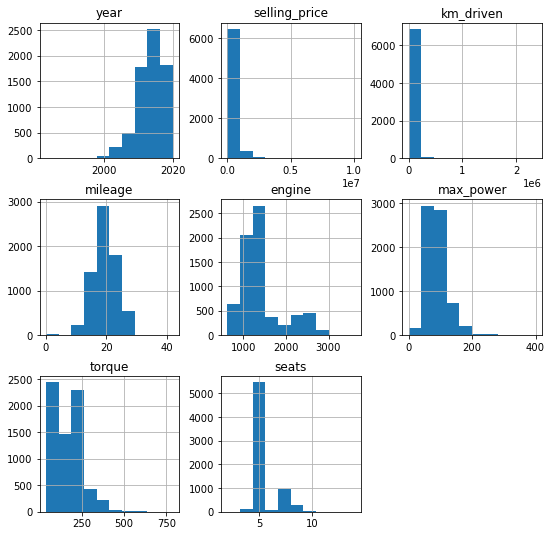

In [109]:
df.hist(figsize =(9, 9))